In [1]:
###
#           1 - fyt price 
# APY = ------------------------
#       (days until maturity)/365
#       
#             -                                    -  (-t)
#            |   y_reserves + total_reserves        |
# fyt_price =| ----------------------------------   |
#            |            x_reserves                |
#             -                                    -
#
#                               y_reserves
# x_reserves =  -----------------------------------------
#               (1-(days until maturity)/365)^(1/t) - 1
#
#
# NOTE: x_reserves calculation assumes that x_reserves == total_supply
###

def calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch):
  t=days_until_maturity/(365*time_stretch)
  T=days_until_maturity/365
  return y_reserves/((1-T*(APY/100))**(-1/t)-1)

def calc_price(x_reserves,y_reserves,total_supply,days_until_maturity,time_stretch):
  t=days_until_maturity/(365*time_stretch)
  return 1/((y_reserves + total_supply)/x_reserves)**t

def calc_apy(price,days_until_maturity):
  T=days_until_maturity/365
  return (1-price)/T * 100

def calc_out_given_in(in_,in_reserves,out_reserves,token_out,g,t):
        k=pow(in_reserves,1-t) + pow(out_reserves,1-t)
        without_fee = out_reserves - pow(k-pow(in_reserves+in_,1-t),1/(1-t))
        if token_out == "base":
            fee =  (in_-without_fee)*g
            with_fee = without_fee-fee
        elif token_out == "fyt":
            fee =  (without_fee-in_)*g
            with_fee = without_fee-fee   
        return (with_fee,without_fee,fee)

In [2]:
APY = 20
days_until_maturity = 30
time_stretch = 4
y_reserves = 100
x_reserves = calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch)
print("(APY,y_reserves,days_until_maturity,time_stretch): "+str((APY,y_reserves,days_until_maturity,time_stretch)))
print("required x_reserves: " + str(x_reserves))
total_supply=x_reserves
price=calc_price(x_reserves,y_reserves,total_supply,days_until_maturity,time_stretch)
print("resulting price: " + str(price))
print("check apy: " + str(calc_apy(price,days_until_maturity)))

amount=10
g=0.5
t=days_until_maturity/(365*time_stretch)
(with_fee,without_fee,fee)=calc_out_given_in(amount,y_reserves+total_supply,x_reserves,"base",g,t)
without_slippage_or_fee = price * amount
slippage = abs(without_slippage_or_fee-without_fee)
print("\nTrade size: " + str(amount))
print("Price w/o slippage: " + str(without_slippage_or_fee))
print("Price with slippage: " + str(without_fee))
print("Percent slippage: " + str(slippage/without_slippage_or_fee * 100))


amount=20
g=0.5
t=days_until_maturity/(365*time_stretch)
(with_fee,without_fee,fee)=calc_out_given_in(amount,y_reserves+total_supply,x_reserves,"base",g,t)
without_slippage_or_fee = price * amount
slippage = abs(without_slippage_or_fee-without_fee)
print("\nTrade size: " + str(amount))
print("Price w/o slippage: " + str(without_slippage_or_fee))
print("Price with slippage: " + str(without_fee))
print("Percent slippage: " + str(slippage/without_slippage_or_fee * 100))


(APY,y_reserves,days_until_maturity,time_stretch): (20, 100, 30, 4)
required x_reserves: 80.62004628866757
resulting price: 0.9835616438356165
check apy: 19.99999999999992

Trade size: 10
Price w/o slippage: 9.835616438356166
Price with slippage: 9.8172994032129
Percent slippage: 0.18623169435353776

Trade size: 20
Price w/o slippage: 19.67123287671233
Price with slippage: 19.596085706105235
Percent slippage: 0.38201556088565436


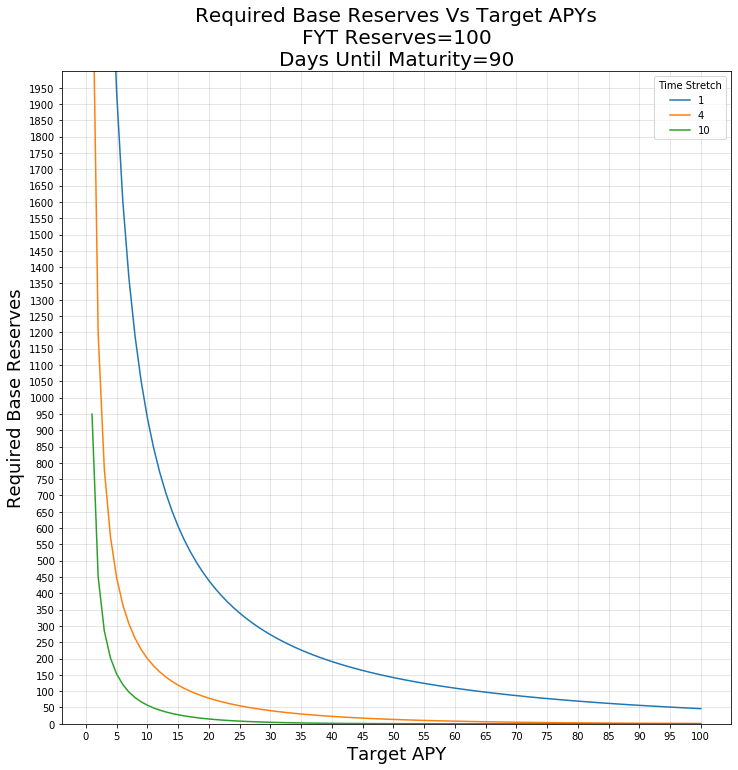

In [4]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(12,12))

for time_stretch in [1,4,10]:
    apy_data = []
    x_reserves_data = []
    for APY in np.arange(1, 101, 1):
      days_until_maturity = 90
      y_reserves=100
      x_reserves = calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch)
      apy_data.append(APY)
      x_reserves_data.append(x_reserves)

    x=apy_data
    y=x_reserves_data
    ax.set_xlabel("Target APY",fontsize=18)
    ax.set_ylabel("Required Base Reserves",fontsize=18)
    ax.set_xticks(np.arange(0, 105, 5))
    ax.set_ylim(0,2000)
    ax.set_yticks(np.arange(0,2000, 50.0))
    ax.plot(x, y,label=time_stretch)
    ax.legend(title="Time Stretch")
plt.title("Required Base Reserves Vs Target APYs\nFYT Reserves=100\nDays Until Maturity=90",fontsize=20 )
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.2)
plt.show()

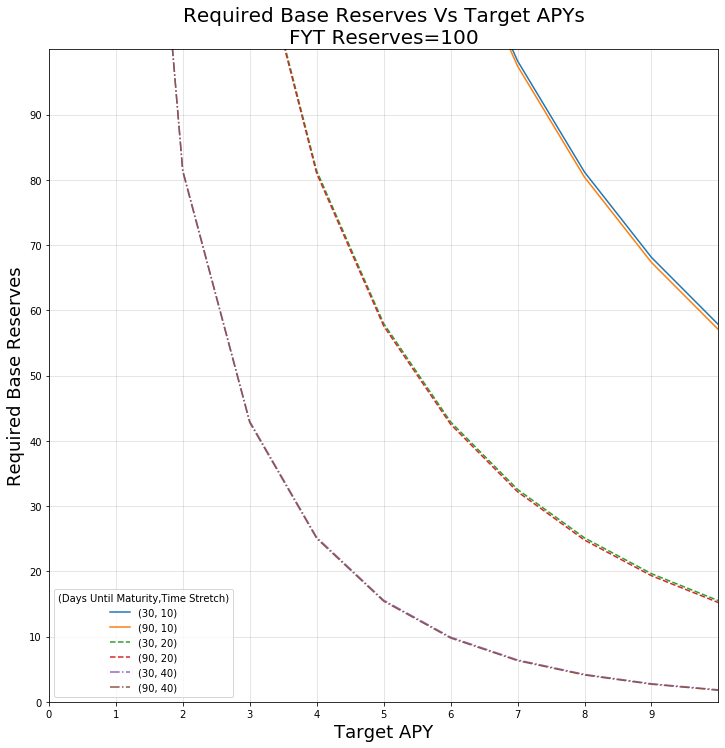

In [5]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(12,12))

for time_stretch in [10,20,40]:
  for days_until_maturity in [30,90]:
    apy_data = []
    x_reserves_data = []
    for APY in np.arange(1, 101, 1):
      y_reserves=100
      x_reserves = calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch)
      apy_data.append(APY)
      x_reserves_data.append(x_reserves)

    x=apy_data
    y=x_reserves_data
    ax.set_xlabel("Target APY",fontsize=18)
    ax.set_ylabel("Required Base Reserves",fontsize=18)
    ax.set_xlim(0,10)
    ax.set_xticks(np.arange(0, 10, 1))
    ax.set_ylim(0,100)
    ax.set_yticks(np.arange(0,100, 10.0))
    if time_stretch == 10:
      ax.plot(x, y,label=(days_until_maturity,time_stretch))
    elif time_stretch == 20:
      ax.plot(x, y,label=(days_until_maturity,time_stretch),linestyle='--')
    elif time_stretch == 40:
      ax.plot(x, y,label=(days_until_maturity,time_stretch),linestyle='-.')
    ax.legend(title="(Days Until Maturity,Time Stretch)")
plt.title("Required Base Reserves Vs Target APYs\nFYT Reserves=100",fontsize=20 )
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.2)
plt.show()

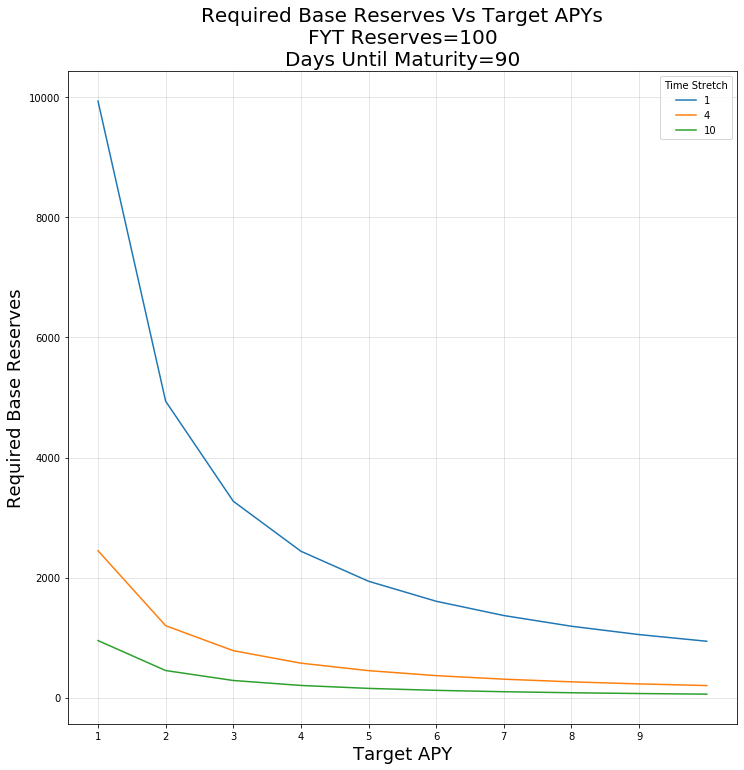

In [6]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(12,12))

for time_stretch in [1,4,10]:
    apy_data = []
    x_reserves_data = []
    for APY in np.arange(1, 11, 1):
      days_until_maturity = 90
      y_reserves=100
      x_reserves = calc_x_reserves(APY,y_reserves,days_until_maturity,time_stretch)
      apy_data.append(APY)
      x_reserves_data.append(x_reserves)

    x=apy_data
    y=x_reserves_data
    ax.set_xlabel("Target APY",fontsize=18)
    ax.set_ylabel("Required Base Reserves",fontsize=18)
    ax.set_xticks(np.arange(0, 10, 1))
    #ax.set_ylim(0,2000)
    #ax.set_yticks(np.arange(0,2000, 50.0))
    ax.plot(x, y,label=time_stretch)
    ax.legend(title="Time Stretch")
plt.title("Required Base Reserves Vs Target APYs\nFYT Reserves=100\nDays Until Maturity=90",fontsize=20 )
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.2)
plt.show()